<a href="https://colab.research.google.com/github/ClementPla/DeepFiberQ/blob/main/DeepFiberQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
Create a data folder on the left panel and upload your images in it.

The accepted formats are tif or czi. But czi seems buggy, so tif preferred for now.

## GPUs

If available, we recommend using a GPU (available on the top right, in the dropdown, select "Change runtime type)"

In [ ]:
!pip uninstall -y dnafiber
!pip install -q git+https://github.com/ClementPla/DeepFiberQ

Found existing installation: dnafiber 0.1.95
Uninstalling dnafiber-0.1.95:
  Successfully uninstalled dnafiber-0.1.95
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path


from dnafiber import get_model
from dnafiber.inference import run, convert_to_dataset, convert_mask_to_image, load_image


In [ ]:
output = Path('output')
output.mkdir(exist_ok=True, parents=True)

In [ ]:
def save(df, mask, filepath):
  output_csv = output / 'csv'/ (d.stem + '.csv')
  output_mask = output/ 'mask' / (d.stem + '.png')
  output_color = output/ 'color' / (d.stem + '.png')

  output_csv.parent.mkdir(exist_ok=True, parents=True)
  output_mask.parent.mkdir(exist_ok=True, parents=True)
  output_color.parent.mkdir(exist_ok=True, parents=True)

  mask_color = convert_mask_to_image(mask, expand=10)
  cv2.imwrite(str(output_mask), mask.astype(np.uint8))
  cv2.imwrite(str(output_color), mask_color[:,:,::-1])

  df.to_csv(output_csv, index=False)


In [ ]:
model = get_model()
for d in Path("data/").rglob('*.tif'):
  mask, counts = run(model, str(d), use_cuda=True)
  # If you don't have GPUs, set use_cuda=False

  df = convert_to_dataset(counts)
  save(df, mask, d)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


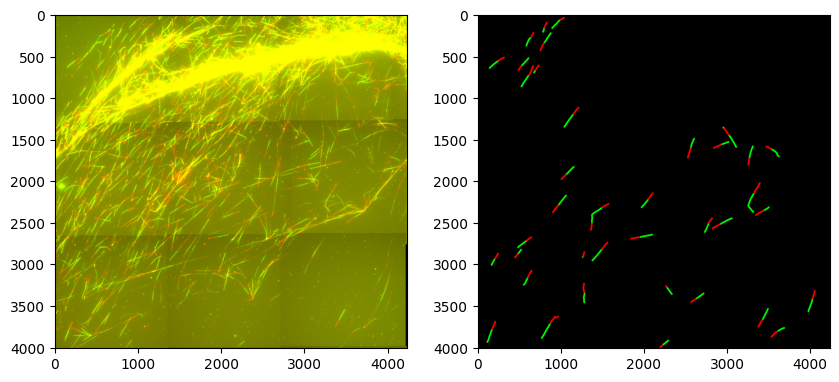

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
image = load_image(str(d))
mask_color = convert_mask_to_image(mask, expand=10)
axs[0].imshow(image)
axs[1].imshow(mask_color)
plt.show()
